In [4]:
import pandas as pd


data = pd.read_csv("../Materials.txt", delimiter="|")


data.head()


,Material_ID,Material_Name,Type,Unit_Price,Stock_Initial,Supplier_ID,Total_Stock_Value,Arrival Date,Carbon_Footprint_per_Unit_kgCO2e,Transport_Distance_km,Recycled_Packaging,Water_Consumption_per_Unit_liters
0,M062,Fromage râpé,Produit laitier,122.31,361,SUPPLIER_10,44153.91,10/30/2023,722,500,Non,3610
1,M249,Eau déminéralisée,Produit laitier,357.78,356,SUPPLIER_18,127369.68,9/10/2023,712,50,Non,3560
2,M131,Sel m,Produit laitier,NaN,40o,SUPPLIER_31,1289z,10/22/2023,NaN,15k,Ov,4040
3,M132,Sucre blanc,Ingrédient,470.11,405,SUPPLIER_18,190394.55,9/30/2023,405,120,Oui,1215
4,M120,Crème pasteurisée,Ingrédient,63.05,174,SUPPLIER_8,10970.7,10/27/2023,174,50,Non,522


In [22]:
# Liste des colonnes à traiter comme numériques
numeric_cols = [
    "Unit_Price", "Stock_Initial", "Total_Stock_Value", 
    "Carbon_Footprint_per_Unit_kgCO2e", "Transport_Distance_km", 
    "Water_Consumption_per_Unit_liters"
]

# Conversion en numérique (les erreurs sont converties en NaN)
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Vérification des types de données et aperçu des premières lignes
print(data.dtypes)
data.head()


Material_ID                           object
Material_Name                         object
Type                                  object
Unit_Price                           float64
Stock_Initial                        float64
Supplier_ID                           object
Total_Stock_Value                    float64
Arrival Date                          object
Carbon_Footprint_per_Unit_kgCO2e     float64
Transport_Distance_km                float64
Recycled_Packaging                    object
Water_Consumption_per_Unit_liters    float64
dtype: object


,Material_ID,Material_Name,Type,Unit_Price,Stock_Initial,Supplier_ID,Total_Stock_Value,Arrival Date,Carbon_Footprint_per_Unit_kgCO2e,Transport_Distance_km,Recycled_Packaging,Water_Consumption_per_Unit_liters
0,M062,Fromage râpé,Produit laitier,122.31,361.0,SUPPLIER_10,44153.91,10/30/2023,722.0,500.0,Non,3610.0
1,M249,Eau déminéralisée,Produit laitier,357.78,356.0,SUPPLIER_18,127369.68,9/10/2023,712.0,50.0,Non,3560.0
2,M131,Sel m,Produit laitier,NaN,NaN,SUPPLIER_31,NaN,10/22/2023,NaN,NaN,Ov,4040.0
3,M132,Sucre blanc,Ingrédient,470.11,405.0,SUPPLIER_18,190394.55,9/30/2023,405.0,120.0,Oui,1215.0
4,M120,Crème pasteurisée,Ingrédient,63.05,174.0,SUPPLIER_8,10970.70,10/27/2023,174.0,50.0,Non,522.0


In [30]:
data.isnull().sum()

Material_ID                          165
Material_Name                        154
Type                                 153
Unit_Price                           232
Stock_Initial                        226
Supplier_ID                          156
Total_Stock_Value                    218
Arrival Date                         147
Carbon_Footprint_per_Unit_kgCO2e     220
Transport_Distance_km                238
Recycled_Packaging                   148
Water_Consumption_per_Unit_liters    222
dtype: int64

In [24]:

summary_stats = data[numeric_cols].describe()
print("Statistiques descriptives :")
print(summary_stats)

# Calcul des quantiles et de l'IQR pour détecter les valeurs aberrantes
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Définition des bornes inférieure et supérieure
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identification des valeurs aberrantes
outliers = (data[numeric_cols] < lower_bound) | (data[numeric_cols] > upper_bound)
outlier_counts = outliers.sum()

print("\nNombre de valeurs aberrantes par colonne :")
print(outlier_counts)


Statistiques descriptives :
       Unit_Price  Stock_Initial  Total_Stock_Value  \
count  768.000000     774.000000         782.000000   
mean   273.852266     557.902548      151742.243632   
std    130.776142     291.714013      108891.764875   
min     50.620000     103.000000        6386.600000   
25%    162.760000     315.250000       61038.202500   
50%    279.710000     568.500000      126807.120000   
75%    381.315000     793.000000      221176.612500   
max    499.490000    3087.461660      477540.210000   

       Carbon_Footprint_per_Unit_kgCO2e  Transport_Distance_km  \
count                        780.000000             762.000000   
mean                         838.957692             224.435696   
std                          509.258679             131.809440   
min                          104.000000              50.000000   
25%                          422.750000             120.000000   
50%                          740.000000             200.000000   
75%           

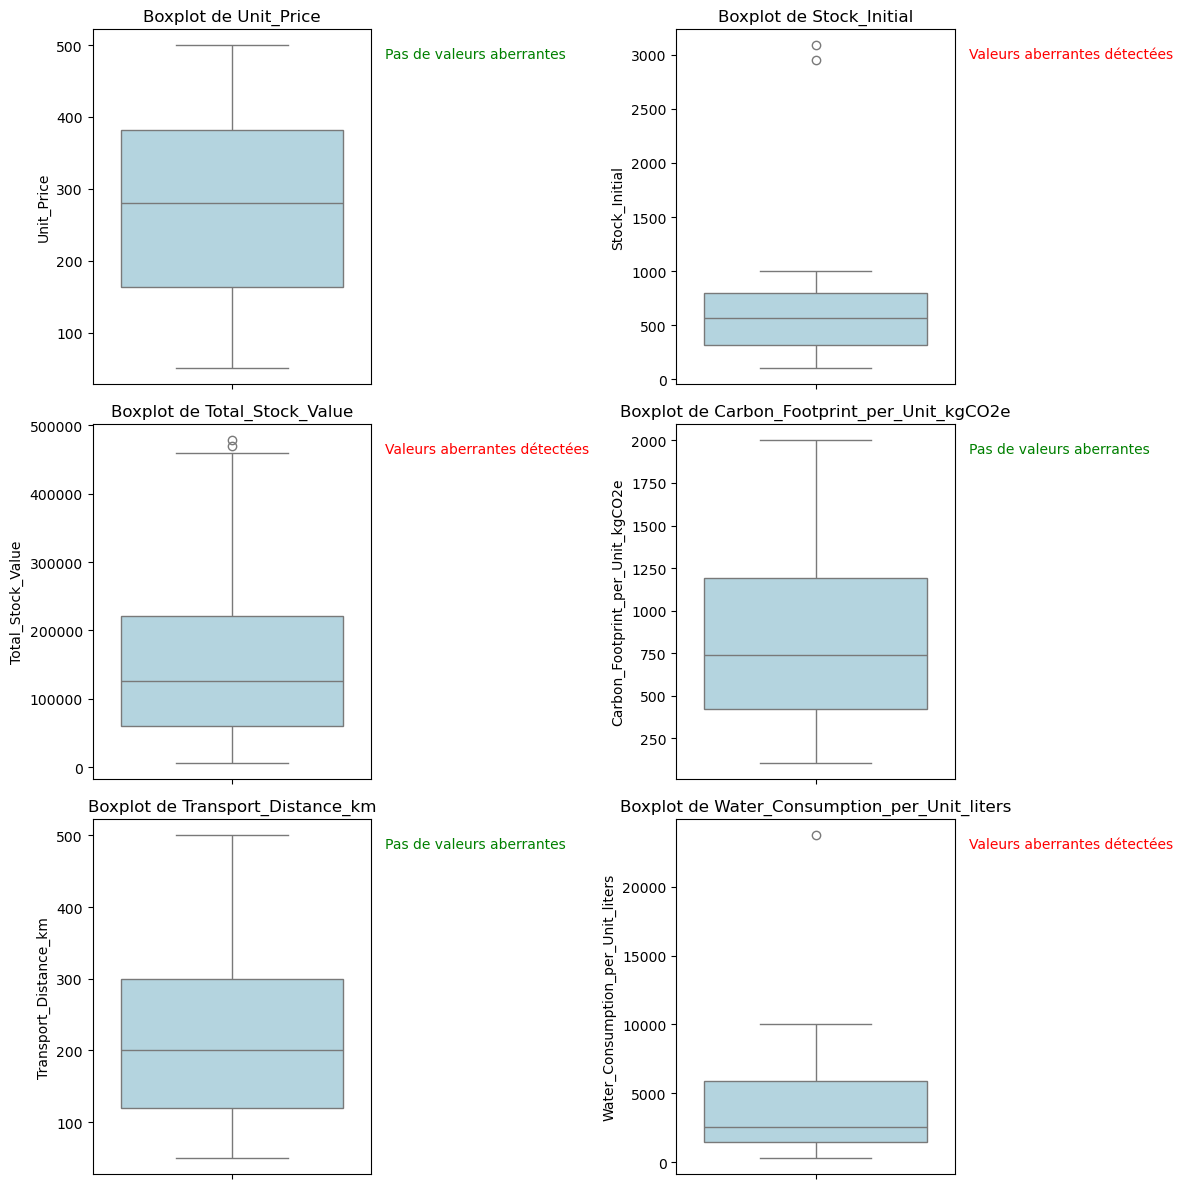

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


def annotate_boxplot(ax, has_outliers):
    text = "Valeurs aberrantes détectées" if has_outliers else "Pas de valeurs aberrantes"
    color = "red" if has_outliers else "green"
    # Position de l'annotation dans l'axe (en coordonnées relatives)
    ax.text(1.05, 0.95, text, transform=ax.transAxes, color=color, fontsize=10, verticalalignment='top')

# Création d'un ensemble de boxplots pour chaque colonne numérique
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(y=data[col], ax=axes[i], color='lightblue')
    axes[i].set_title(f"Boxplot de {col}")
    has_outliers = outlier_counts[col] > 0
    annotate_boxplot(axes[i], has_outliers)

plt.tight_layout()
plt.show()


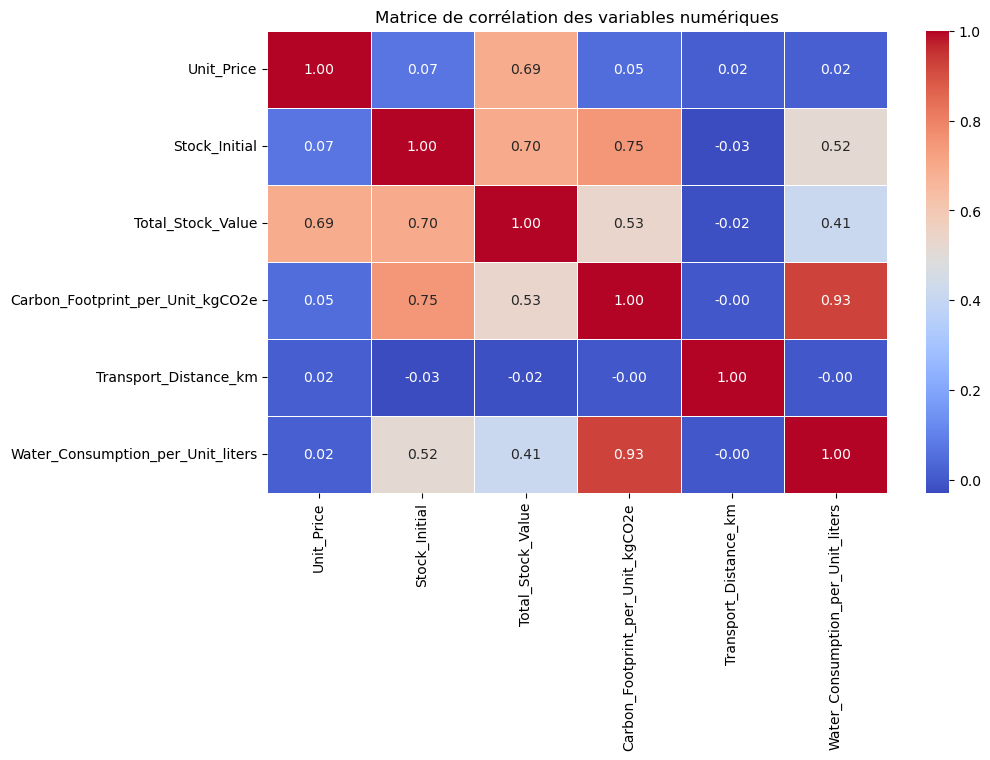

Interprétation des relations entre colonnes :

La corrélation entre 'Unit_Price' et 'Stock_Initial' est de 0.07 (faible positive).
La corrélation entre 'Unit_Price' et 'Total_Stock_Value' est de 0.69 (modérée positive).
La corrélation entre 'Unit_Price' et 'Carbon_Footprint_per_Unit_kgCO2e' est de 0.05 (faible positive).
La corrélation entre 'Unit_Price' et 'Transport_Distance_km' est de 0.02 (faible positive).
La corrélation entre 'Unit_Price' et 'Water_Consumption_per_Unit_liters' est de 0.02 (faible positive).
La corrélation entre 'Stock_Initial' et 'Total_Stock_Value' est de 0.70 (modérée positive).
La corrélation entre 'Stock_Initial' et 'Carbon_Footprint_per_Unit_kgCO2e' est de 0.75 (forte positive).
La corrélation entre 'Stock_Initial' et 'Transport_Distance_km' est de -0.03 (faible négative).
La corrélation entre 'Stock_Initial' et 'Water_Consumption_per_Unit_liters' est de 0.52 (modérée positive).
La corrélation entre 'Total_Stock_Value' et 'Carbon_Footprint_per_Unit_kgCO2e' e

In [28]:
# Calcul de la matrice de corrélation pour les colonnes numériques
corr_matrix = data[numeric_cols].corr()

# Affichage de la matrice de corrélation avec heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation des variables numériques")
plt.show()

# Interprétation des relations entre colonnes
print("Interprétation des relations entre colonnes :\n")
for i, col1 in enumerate(numeric_cols):
    for j in range(i + 1, len(numeric_cols)):
        col2 = numeric_cols[j]
        corr_value = corr_matrix.loc[col1, col2]
        # Définir une interprétation qualitative
        if abs(corr_value) >= 0.7:
            relation = "forte"
        elif abs(corr_value) >= 0.3:
            relation = "modérée"
        else:
            relation = "faible"
        # Indiquer le signe de la relation
        signe = "positive" if corr_value > 0 else "négative" if corr_value < 0 else "aucune"
        print(f"La corrélation entre '{col1}' et '{col2}' est de {corr_value:.2f} ({relation} {signe}).")


In [9]:
# Création d'un Data Dictionary
data_dict = {
    "Nom de la Colonne": [],
    "Type de données": [],
    "Nombre de valeurs manquantes": [],
    "Exemples de valeurs": [],
    "Description": []  # Complétez cette colonne selon vos besoins
}

# Remplissage pour chaque colonne du DataFrame
for col in data.columns:
    data_dict["Nom de la Colonne"].append(col)
    data_dict["Type de données"].append(str(data[col].dtype))
    data_dict["Nombre de valeurs manquantes"].append(data[col].isnull().sum())
    exemples = data[col].dropna().astype(str).head(3).tolist()
    data_dict["Exemples de valeurs"].append(", ".join(exemples))
    
    # Exemple de description pour quelques colonnes (à adapter)
    if col == "Material_ID":
        desc = "Identifiant unique du matériau"
    elif col == "Material_Name":
        desc = "Nom du matériau"
    elif col == "Type":
        desc = "Catégorie du matériau (Produit laitier, Ingrédient, etc.)"
    elif col == "Unit_Price":
        desc = "Prix unitaire"
    elif col == "Stock_Initial":
        desc = "Quantité initiale en stock"
    elif col == "Supplier_ID":
        desc = "Identifiant du fournisseur"
    elif col == "Total_Stock_Value":
        desc = "Valeur totale du stock"
    elif col == "Arrival Date":
        desc = "Date d'arrivée du matériau"
    elif col == "Carbon_Footprint_per_Unit_kgCO2e":
        desc = "Empreinte carbone par unité (kg CO2e)"
    elif col == "Transport_Distance_km":
        desc = "Distance de transport (km)"
    elif col == "Recycled_Packaging":
        desc = "Indique si l'emballage est recyclé (Oui/Non)"
    elif col == "Water_Consumption_per_Unit_liters":
        desc = "Consommation d'eau par unité (litres)"
    else:
        desc = ""
    data_dict["Description"].append(desc)

# Conversion du dictionnaire en DataFrame
df_dict = pd.DataFrame(data_dict)

# Affichage du Data Dictionary
print(df_dict)

# Export vers Excel (le fichier source n'est pas modifié)
output_excel = "Data_Dictionary.xlsx"
df_dict.to_excel(output_excel, index=False)
print(f"\nData Dictionary exporté dans le fichier : {output_excel}")


                    Nom de la Colonne Type de données  \
0                         Material_ID          object   
1                       Material_Name          object   
2                                Type          object   
3                          Unit_Price         float64   
4                       Stock_Initial         float64   
5                         Supplier_ID          object   
6                   Total_Stock_Value         float64   
7                        Arrival Date          object   
8    Carbon_Footprint_per_Unit_kgCO2e         float64   
9               Transport_Distance_km         float64   
10                 Recycled_Packaging          object   
11  Water_Consumption_per_Unit_liters         float64   

    Nombre de valeurs manquantes  \
0                            165   
1                            154   
2                            153   
3                            232   
4                            226   
5                            156   
6     

In [10]:
# Parcours de chaque colonne pour afficher les valeurs uniques et une interprétation
for col in data.columns:
    uniques = data[col].dropna().unique()
    print(f"\nColonne : {col}")
    print("Valeurs uniques :", uniques)
    
    # Interprétation simple selon le type de colonne
    if data[col].dtype == 'object':
        if len(uniques) < 20:
            print("Interprétation : Cette colonne semble catégorielle et possède un nombre limité de modalités.")
        else:
            print("Interprétation : Cette colonne contient beaucoup de modalités. Vérifiez la présence d'erreurs ou d'incohérences.")
    else:
        print("Interprétation : Colonne numérique. Vérifiez les valeurs extrêmes et la distribution.")



Colonne : Material_ID
Valeurs uniques : ['M062' 'M249' 'M131' 'M132' 'M120' 'M095' 'M343' 'M275' 'M350' 'M259'
 'M248' 'M348' 'M155' 'M187' 'M158' 'M4h' 'M181' 'M495' 'M041' 'M163'
 'M288' 'M166' 'M020' 'M188' 'M007' 'M332' 'M144' 'M415' 'M021' 'M250'
 'M308' 'M151' 'M145' 'M182' 'M380' 'M328' 'M317' 'M310' 'M278' 'M3a'
 'M429' 'M397' 'M211' 'M176' 'M466' 'M060' 'M499' 'M212' 'M382' 'M030'
 'M244' 'M205' 'M405' 'M233' 'M090' 'M381' 'M497' 'M012' 'M175' 'M448'
 'M135' 'M361' 'M449' 'M0f' 'M186' 'M253' 'M298' 'M078' 'M3e' 'M077'
 'M199' 'M179' 'M235' 'M461' 'M470' 'M198' 'M388' 'M101' 'M493' 'M009'
 'M418' 'M153' 'M073' 'M313' 'M3p' 'M274' 'M374' 'M119' 'M087' 'M180'
 'M128' 'M055' 'M004' 'M217' 'M075' 'M061' 'M246' 'M295' 'M402' 'M086'
 'M195' 'M375' 'M491' 'M001' 'M378' 'M239' 'M1t' 'M376' 'M480' 'M391'
 'M377' 'M384' 'M053' 'M427' 'M409' 'M046' 'M437' 'M238' 'M117' 'M072'
 'M202' 'M108' 'M1f' 'M011' 'M076' 'M088' 'M299' 'M451' 'M347' 'M051'
 'M043' 'M1a' 'M0b' 'M039' 'M281' 'M056' 'M